<a href="https://colab.research.google.com/github/Yutthana-BJ/Project_YB/blob/main/ML_Association_Rule_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Input Data
Download the data set from https://www.kaggle.com/datasets/carrie1/ecommerce-data

Then that, save the downloaded data in `Google Drive`.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data_set = '/content/drive/MyDrive/Colab Notebooks/DataSet/E-commerce_Data.csv'
df = pd.read_csv(data_set)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# 2. Data Preparation
Preparing and checking the data so that it is available in the desired and correct format. This also includes deleting canceled `transaction (InvoiceNo)` from the data.

In [34]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis = 0, subset = ['InvoiceNo'], inplace = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')] # delete canceled transaction
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# 3. Cohort Analysis
Segmentation of customers according to the period in which they purchased the product for the `first time` as a criterion for checking the `retention rate` of individual customer groups in `subsequent months`.

In [35]:
# Create 'RangesInvoiceDate' and 'FirstInvoiceDate' features that serve as criteria for segmenting each customer.
df['RangesInvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.year.map(str) + "-" + pd.to_datetime(df['InvoiceDate']).dt.month.map(str) + "-01"
df['RangesInvoiceDate'] = pd.to_datetime(df['RangesInvoiceDate']).dt.date
df['FirstInvoiceDate'] = df.groupby('CustomerID')['RangesInvoiceDate'].transform('min')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-8bd63f968bd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RangesInvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.year.map(str) + "-" + pd.to_datetime(df['InvoiceDate']).dt.month.map(str) + "-01"
<ipython-input-35-8bd63f968bd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RangesInvoiceDate,FirstInvoiceDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-01,2011-08-01


In [36]:
def Periods_month(df, col1, col2):
  current_year = pd.to_datetime(df[col1]).dt.year
  RangesInvoiceDate = pd.to_datetime(df[col2]).dt.month
  cohort_year = pd.to_datetime(df[col1]).dt.year
  FirstInvoiceDate = pd.to_datetime(df[col2]).dt.month
  return (current_year - cohort_year) * 12 + RangesInvoiceDate - FirstInvoiceDate
df['Periods_month'] = Periods_month(df, 'RangesInvoiceDate', 'FirstInvoiceDate')

def months_diff(df, col1, col2):
    RangesInvoiceDate = pd.to_datetime(df[col1]).dt.month
    FirstInvoiceDate = pd.to_datetime(df[col2]).dt.month
    return RangesInvoiceDate - FirstInvoiceDate
df['months_diff'] = months_diff(df, 'RangesInvoiceDate', 'FirstInvoiceDate')

def years_diff(df, col1, col2):
    current_year = pd.to_datetime(df[col1]).dt.year
    cohort_year = pd.to_datetime(df[col2]).dt.year
    return current_year - cohort_year
df['years_diff'] = years_diff(df, 'RangesInvoiceDate', 'FirstInvoiceDate')

def Periods_month(df, col1, col2):
    return df[col1] * 12 + df[col2]
df['Periods_month'] = Periods_month(df, 'years_diff', 'months_diff')

cohort_counts = df.groupby(['FirstInvoiceDate', 'Periods_month'])['CustomerID'].nunique()
cohort_counts_df = cohort_counts.to_frame().rename(columns={'CustomerID':'Customers'}).sort_values(by=['FirstInvoiceDate'])
cohort_counts_df['RetentionRate'] = cohort_counts_df['Customers'] / cohort_counts_df.groupby(['FirstInvoiceDate'])['Customers'].transform('max')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-0f39246b451d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Periods_month'] = Periods_month(df, 'RangesInvoiceDate', 'FirstInvoiceDate')
<ipython-input-36-0f39246b451d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Periods_month', ylabel='FirstInvoiceDate'>

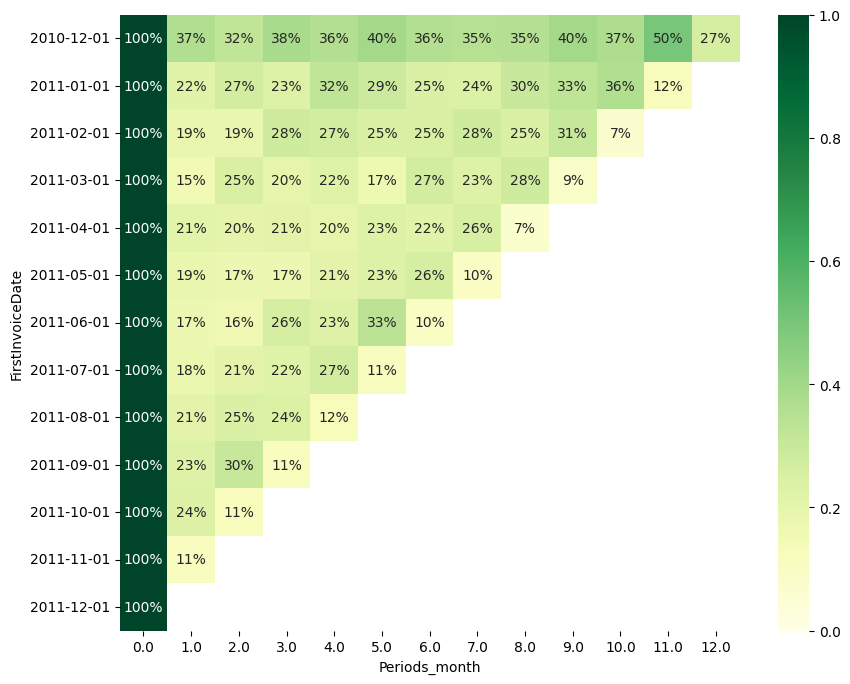

In [37]:
# Visulize the Cohort Analysis
cohorts_pivot = cohort_counts_df.pivot_table(index='FirstInvoiceDate', columns = 'Periods_month', values = 'RetentionRate')
plt.figure(figsize = (10, 8))
sns.heatmap(data = cohorts_pivot, annot = True, fmt = '.0%', vmin = 0, vmax = 1, cmap = 'YlGn')

The Cohort Analysis showed that customer retention rates fell gradually, with the `12th month of 2011` being the period in which all customer groups had the `lowest retention rates`.

# 4. Data Modeling
Due to the rapidly declining retention rate so search to the `Association Rules` or `Recommendation Model` using `Algorithm Apriori` to recommend products related to the pattern of `frequency of joint purchases` and encourage customers to purchase products to increase the retention rate.

In [25]:
# Transform data to 'Pivot Table' format
pivot = (df[df['Country']=="France"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

# Transform data values to the format of 0 and 1, where 0:No and 1:Yes
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

pivot_set = pivot.applymap(encode_units)
pivot_set.drop('POSTAGE', inplace=True, axis=1)
pivot_set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C579562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C580161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Create Association Rules, [2 parameters are defined: "min_support" and "min_confidence"]
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(pivot_set, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.80).round(4)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0824,0.0803,0.0672,0.8158,10.1643,0.0606,4.9929,0.9826
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0803,0.0824,0.0672,0.8378,10.1643,0.0606,5.6584,0.9803
2,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL ),0.0586,0.0607,0.0542,0.9259,15.2447,0.0507,12.6800,0.9925
3,(CHILDRENS CUTLERY DOLLY GIRL ),(CHILDRENS CUTLERY SPACEBOY ),0.0607,0.0586,0.0542,0.8929,15.2447,0.0507,8.7867,0.9948
4,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.1085,0.1171,0.1041,0.9600,8.1956,0.0914,22.0716,0.9848
5,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.1171,0.1085,0.1041,0.8889,8.1956,0.0914,8.0239,0.9945
6,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED ),0.0629,0.0803,0.0542,0.8621,10.7409,0.0492,6.6681,0.9678
7,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE GREEN),0.0629,0.0824,0.0542,0.8621,10.4583,0.0490,6.6524,0.9651
8,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE PINK),0.0672,0.0868,0.0542,0.8065,9.2944,0.0484,4.7184,0.9567
9,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.0868,0.1085,0.0846,0.9750,8.9895,0.0752,35.6616,0.9732


When using Association Rules created from `data of customer only the French country`, it was found that by setting the `minimum_support value to 0.05` and the `minimum_confidence value to 0.80`, a total of `11 Association Rules` can be created as described above.